# 從stockq網站抓取各國股市指數

    source: http://www.stockq.org/

抓取下列資料: 


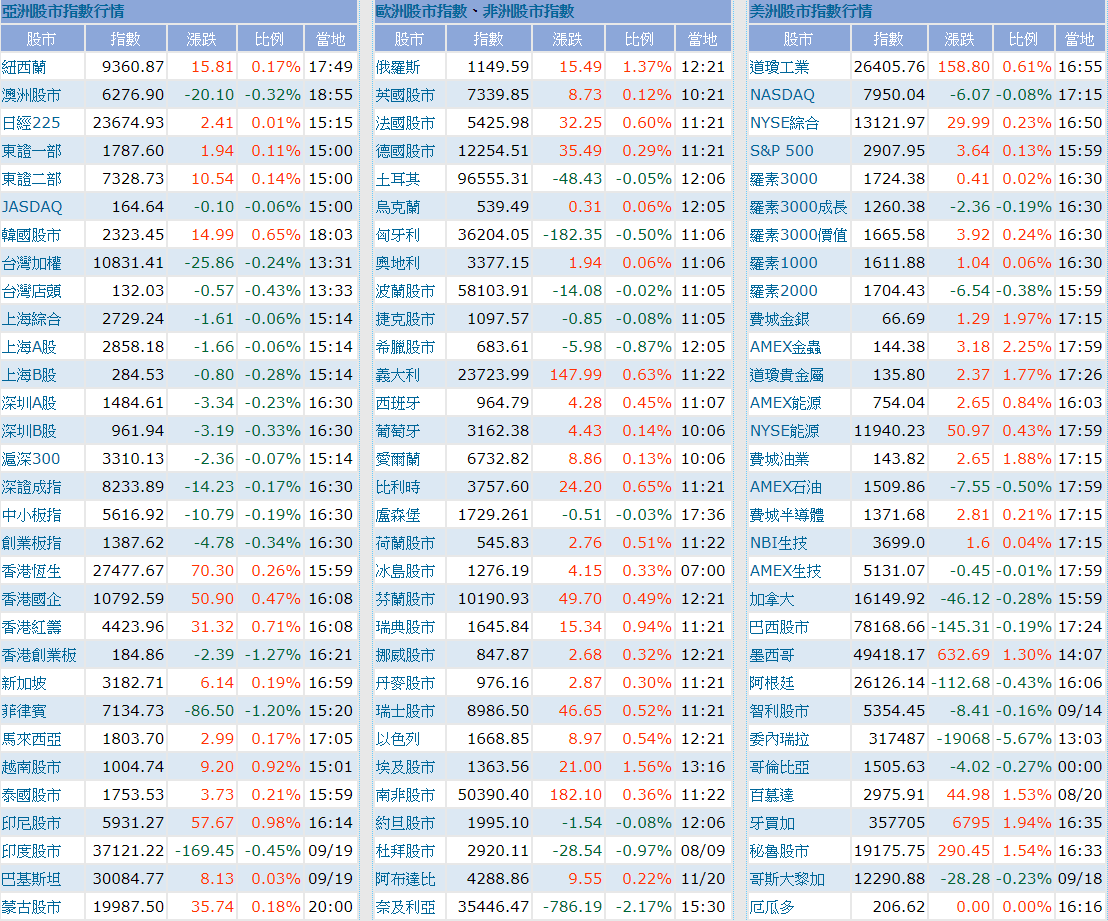

In [130]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image

imagePath = r'C:\Users\user\Desktop\stock_list.png'

print('抓取下列資料: ')
Image(filename=imagePath)

In [131]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

response = requests.get("http://www.stockq.org/")
content = response.content
# content = str(content,'utf-8')

parser = BeautifulSoup(content, 'html.parser')

body = parser.find_all('body')
print(body)

[<body>
<!-- BANNER -->
<div align="center">
<table bgcolor="#6a6a6a" cellpadding="0" cellspacing="1" width="100%"><tr><td>
<table cellpadding="0" cellspacing="0" width="100%"><tr><td>
<table border="0" cellpadding="0" cellspacing="0" width="100%">
<tr>
<td align="center" background="/BANNER/tile_back_31x92.gif" height="92" width="280">
<div align="center">
<a href="/" target="_top" title="全球股市指數">
<img alt="全球股市指數" border="0" height="92" src="/BANNER/SQ237x92.gif" width="237"/></a>
</div>
</td>
<td background="/BANNER/tile_back_31x92.gif" height="92">
<div align="center">
<span id="js_nomura"></span>
</div>
</td>
</tr>
</table>
</td></tr><tr><td height="30pt">
<div id="menu">
<table background="/BANNER/tile_sub.gif" border="0" cellpadding="0" cellspacing="0" height="30pt" width="100%">
<tr>
<td align="left" valign="middle">
<a href="/" target="_top" title="全球股市指數">首頁</a> 
				 
				<a href="/market/" target="_top" title="市場動態">市場動態</a>
<a href="/stock/history/" target="_top" title="歷史

In [114]:
tr = body[0].find_all('tr', class_=["row1", "row2"])

stock_list = []

for count in range(len(tr)):
    market_name = tr[count].find_all('td', {'align': 'left'})
    
    if market_name[0].text == '波羅的海乾散貨':
        break
    else:
        change_up_down = tr[count].find_all('td', class_=["changeup", "changedown"])
        price = tr[count].find_all('td', {'nowrap': ''})
    
        stock_list.append([market_name[0].text, price[1].text, change_up_down[0].text, change_up_down[1].text])

stock_list

[['紐西蘭', '9360.87', '15.81', '0.17%'],
 ['澳洲股市', '6276.90', '-20.10', '-0.32%'],
 ['日經225', '23674.93', '2.41', '0.01%'],
 ['東證一部', '1787.60', '1.94', '0.11%'],
 ['東證二部', '7328.73', '10.54', '0.14%'],
 ['JASDAQ', '164.64', '-0.10', '-0.06%'],
 ['韓國股市', '2323.45', '14.99', '0.65%'],
 ['台灣加權', '10831.41', '-25.86', '-0.24%'],
 ['台灣店頭', '132.03', '-0.57', '-0.43%'],
 ['上海綜合', '2729.24', '-1.61', '-0.06%'],
 ['上海A股', '2858.18', '-1.66', '-0.06%'],
 ['上海B股', '284.53', '-0.80', '-0.28%'],
 ['深圳A股', '1484.61', '-3.34', '-0.23%'],
 ['深圳B股', '961.94', '-3.19', '-0.33%'],
 ['滬深300', '3310.13', '-2.36', '-0.07%'],
 ['深證成指', '8233.89', '-14.23', '-0.17%'],
 ['中小板指', '5616.92', '-10.79', '-0.19%'],
 ['創業板指', '1387.62', '-4.78', '-0.34%'],
 ['香港恆生', '27477.67', '70.30', '0.26%'],
 ['香港國企', '10792.59', '50.90', '0.47%'],
 ['香港紅籌', '4423.96', '31.32', '0.71%'],
 ['香港創業板', '184.86', '-2.39', '-1.27%'],
 ['新加坡', '3180.43', '3.86', '0.12%'],
 ['菲律賓', '7134.73', '-86.50', '-1.20%'],
 ['馬來西亞', '1803.70', '

In [115]:
dataframe = pd.DataFrame(stock_list, columns = ["股市", "指數", "漲跌", "比例"])

dataframe

,股市,指數,漲跌,比例
0,紐西蘭,9360.87,15.81,0.17%
1,澳洲股市,6276.90,-20.10,-0.32%
2,日經225,23674.93,2.41,0.01%
3,東證一部,1787.60,1.94,0.11%
4,東證二部,7328.73,10.54,0.14%
5,JASDAQ,164.64,-0.10,-0.06%
6,韓國股市,2323.45,14.99,0.65%
7,台灣加權,10831.41,-25.86,-0.24%
8,台灣店頭,132.03,-0.57,-0.43%
9,上海綜合,2729.24,-1.61,-0.06%
